<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/TensorFlow/TensorFlow_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning With Tensor Flow

In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__   #this will show us the verison of using tensorflow package

'1.13.1'

#Importing data 
tensorflow its self have a variety of data sets which I am going to use the mnist

In [56]:
mnist = tf.keras.datasets.mnist  # 28 x 28 images of hand-written digits 0-9
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('the shape of X_train is : {}'.format(X_train.shape))
print('the shape of X_test is : {}'.format(X_test.shape))

the shape of X_train is : (60000, 28, 28)
the shape of X_test is : (10000, 28, 28)


And now lets visualize the data 

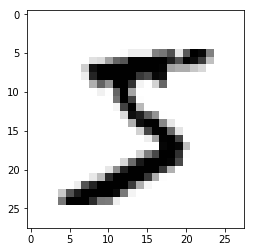

In [57]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

#Scaling
also after scaling, the images will change a little bit but **Normmalazation** has a *significant* effect on the training procress of Neural Network

In [0]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

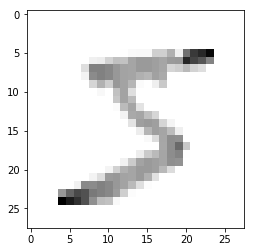

In [59]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

#Defining Method

there are two kind of models that Sequential one is more common

In [0]:
model = tf.keras.models.Sequential()  
model.add(tf.keras.layers.Flatten())   # It is actually our input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # First hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer

# Training the Model

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train ,epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2629 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1067 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0728 - acc: 0.9771


#Note :
note that the neural networks are professional fitters. And the thing that we must be nervouse 
about is **over fitting**.

so we must calculate the ```val_loss```  and ```val_acc```

In [65]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('val_loss is {}'.format(val_loss)) 
print('val_acc is {}'.format(val_acc))

10000/10000 [==============================] - 0s 49us/sample - loss: 0.6932 - acc: 0.9567
val_loss is 0.6932231618879807
val_acc is 0.9567000269889832


#Saving a model
the interesting thing with models is that we can save and load trained models

In [0]:
model.save('number.model')  

#Loading a model

In [67]:
new_model = tf.keras.models.load_model('number.model')

#Predicting 
we use ```model.predict()``` syntax

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
the predicted value is : 0


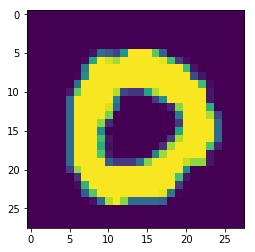

In [85]:
i = 440
predict = model.predict([x_test])  # I don't know why but the argumant must be whole the list

print(predict)  # Now you can easily see that it is pretty messy
predict = np.argmax(predict[i])
print('the predicted value is : {}'.format(predict))
plt.imshow(x_test[i])